In [1]:
#K-means Clustering
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
data = pd.read_csv('data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


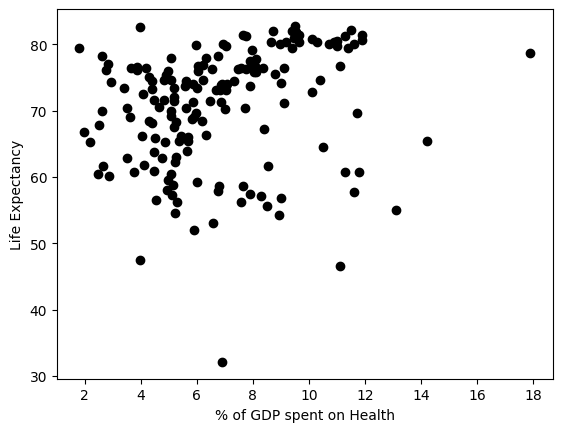

In [2]:
X = data[['life_expec', 'health']]

#Visualise data 
plt.scatter(X["health"],X["life_expec"],c='black')
plt.xlabel('% of GDP spent on Health')
plt.ylabel('Life Expectancy')
plt.show()

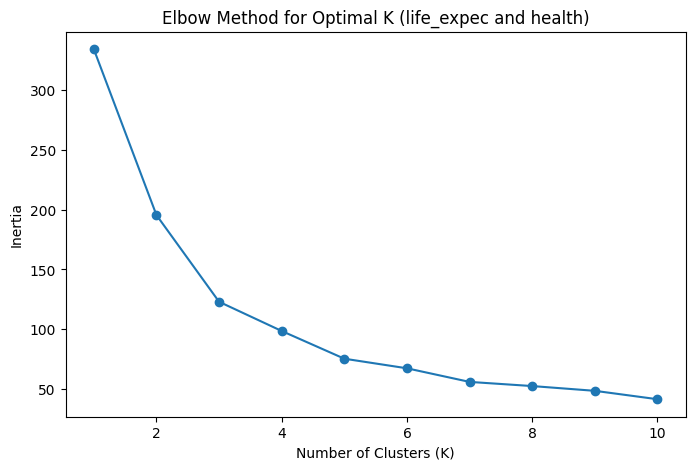

In [3]:
features = data[['life_expec', 'health']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (life_expec and health)')
plt.show()

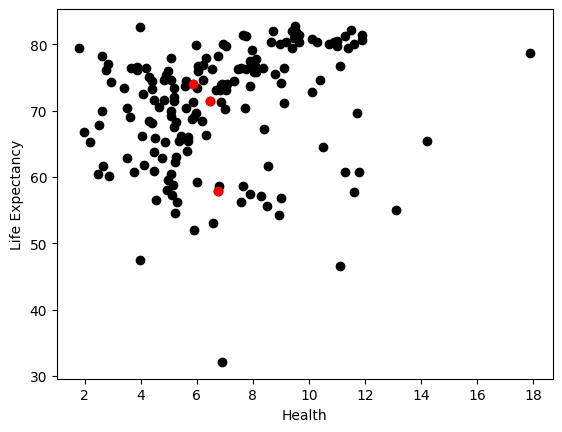

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["health"],X["life_expec"],c='black')
plt.scatter(Centroids["health"],Centroids["life_expec"],c='red')
plt.xlabel('Health')
plt.ylabel('Life Expectancy')
plt.show()

In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

import warnings
warnings.filterwarnings('ignore')

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["health"]-row_d["health"])**2
            d2=(row_c["life_expec"]-row_d["life_expec"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["life_expec","health"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['life_expec'] - Centroids['life_expec']).sum() + (Centroids_new['health'] - Centroids['health']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["life_expec","health"]]

-0.33933930463629114
-0.13550700076344935
-0.2450883286647949
-0.17182581079406045
-0.36985362950057965
0.0


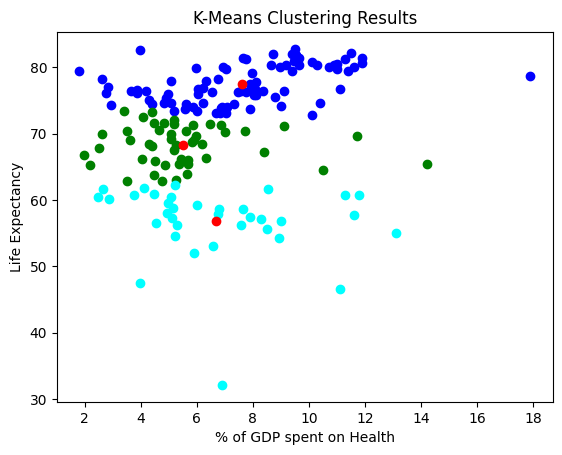

In [6]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["health"],data["life_expec"],c=color[k])
plt.scatter(Centroids["health"],Centroids["life_expec"],c='red')
plt.xlabel('% of GDP spent on Health')
plt.ylabel('Life Expectancy')
plt.title('K-Means Clustering Results')
plt.show()

Initial data shape: (35, 6)
Length of data: 35
Length of labels: 35
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion Matrix:
 [[7 0]
 [0 4]]


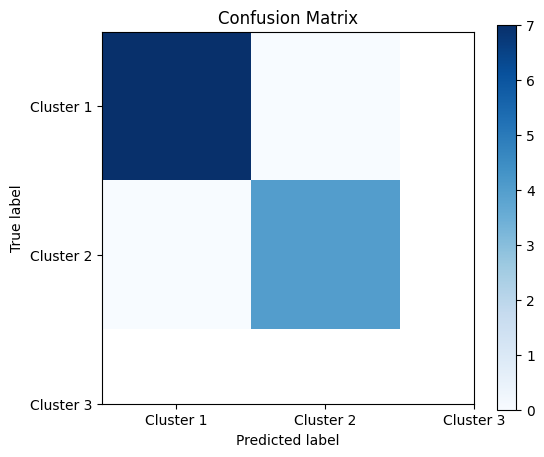

Inertia: 25.071873489258092
Silhouette Score: 0.423
Dunn Index: 0.591


In [7]:
# Check data dimensions
print(f"Initial data shape: {data.shape}")

# Select the features for clustering
features = data[['life_expec', 'health']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Apply KMeans clustering
K = 3  # Number of clusters
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(normalized_features)

# Get the cluster labels
labels = kmeans.labels_

# Check that the length of the labels matches the data
print(f"Length of data: {len(data)}")
print(f"Length of labels: {len(labels)}")

# Add the cluster labels to the data as a new column
data['Cluster'] = labels  # This should match the length of the original data

# Now split the data for KNN
X = data[['life_expec', 'health', 'Cluster']]  # Include 'Cluster' as a feature
y = data['Cluster']  # 'Cluster' is the target for KNN

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train[['life_expec', 'health', 'Cluster']], y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test[['life_expec', 'health', 'Cluster']])

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(K), [f'Cluster {i+1}' for i in range(K)])
plt.yticks(np.arange(K), [f'Cluster {i+1}' for i in range(K)])
plt.show()

# Calculate the Inertia (sum of squared distances to centroids)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_features, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Compute Dunn Index
def dunn_index(features, labels, centroids):
    # Calculate the distance between cluster centroids
    inter_distances = cdist(centroids, centroids, metric='euclidean')
    np.fill_diagonal(inter_distances, np.inf)  # Ignore diagonal
    min_inter_distance = np.min(inter_distances)

    # Calculate the maximum intra-cluster distance
    intra_distances = []
    for cluster_id in range(K):
        cluster_points = features[labels == cluster_id]
        if len(cluster_points) > 1:
            intra_distances.append(np.max(cdist(cluster_points, cluster_points, metric='euclidean')))
    max_intra_distance = max(intra_distances)

    return min_inter_distance / max_intra_distance

centroids = kmeans.cluster_centers_
dunn = dunn_index(normalized_features, labels, centroids)
print(f"Dunn Index: {dunn:.3f}")

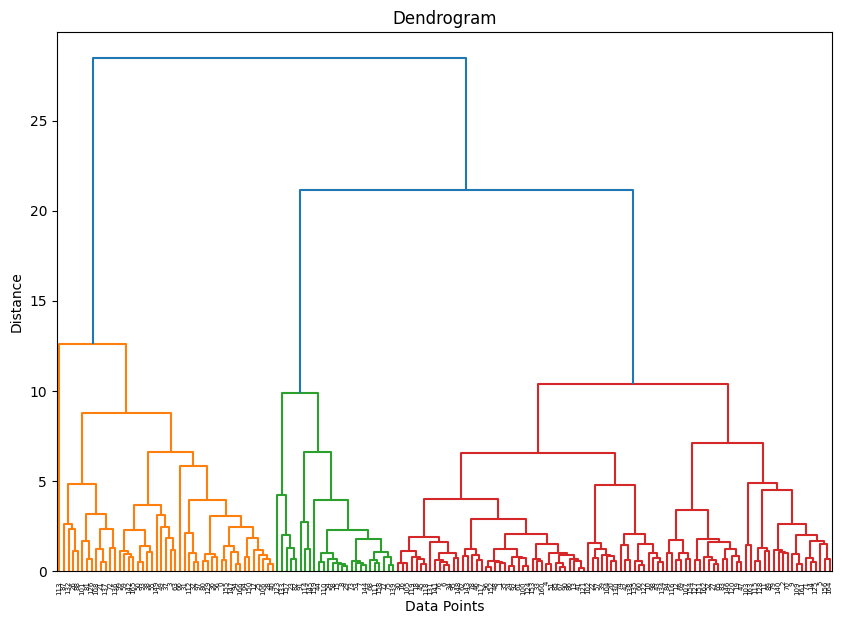

Dunn Index: 0.05694504070266749
Inertia: child_mort    529.227722
income        206.236734
health        318.610012
inflation     423.304569
life_expec    184.970635
total_fer     532.646777
gdpp          203.025694
dtype: float64
Silhouette Score: 0.3720034293783205


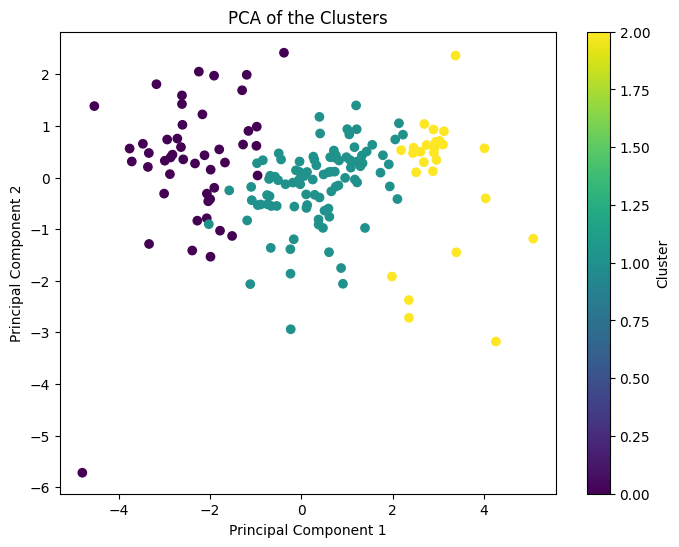

In [8]:
#Hierarchical Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform 
from sklearn.preprocessing import StandardScaler


# Load data
data = pd.read_csv('data.csv')

# Select relevant features for clustering
features = ['child_mort', 'income', 'health','inflation', 'life_expec', 'total_fer', 'gdpp']
X = data[features]

# Normalize the data
X_norm = (X - X.mean()) / X.std()

# Hierarchical clustering from scratch
def compute_distance_matrix(data):
    return squareform(pdist(data, metric='euclidean'))

def hierarchical_clustering(data, n_clusters):
    dist_matrix = compute_distance_matrix(data)
    clusters = {i: [i] for i in range(len(data))}
    
    while len(clusters) > n_clusters:
        min_dist = np.inf
        to_merge = None
        for i in clusters:
            for j in clusters:
                if i < j:
                    dist = dist_matrix[i, j]
                    if dist < min_dist:
                        min_dist = dist
                        to_merge = (i, j)
        
        cluster_1, cluster_2 = to_merge
        new_cluster = clusters[cluster_1] + clusters[cluster_2]
        
        del clusters[cluster_1]
        del clusters[cluster_2]
        clusters[len(clusters)] = new_cluster
        
        for i in clusters:
            if i != len(clusters) - 1:
                dist_matrix[len(clusters) - 1, i] = dist_matrix[i, len(clusters) - 1] = np.min([dist_matrix[i, cluster_1], dist_matrix[i, cluster_2]])
    
    return clusters

# Dendrogram
Z = sch.linkage(X_norm, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Dunn Index
def dunn_index(clusters, data):
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    # Compute intra-cluster distances
    for cluster in clusters.values():
        cluster_points = data.iloc[cluster]  # Use .iloc to index by row positions
        distances = pairwise_distances(cluster_points, metric='euclidean')
        intra_cluster_distances.append(np.max(distances))  # Max distance within a cluster
    
    # Compute inter-cluster distances
    for i, cluster_1 in clusters.items():
        for j, cluster_2 in clusters.items():
            if i < j:
                dist_matrix = pairwise_distances(data.iloc[cluster_1], data.iloc[cluster_2], metric='euclidean')
                inter_cluster_distances.append(np.min(dist_matrix))  # Min distance between clusters
    
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

clusters = hierarchical_clustering(X_norm, n_clusters=3)
print("Dunn Index:", dunn_index(clusters, X_norm))

# Inertia
agglom = AgglomerativeClustering(n_clusters=3)
agglom.fit(X_norm)
inertia = np.sum((X_norm - agglom.labels_.reshape(-1, 1))**2)
print("Inertia:", inertia)

# Silhouette Score
sil_score = silhouette_score(X_norm, agglom.labels_)
print("Silhouette Score:", sil_score)

# Visualization: PCA + Clustering Results

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglom.labels_, cmap='viridis', marker='o')
plt.title('PCA of the Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.88      0.90        32
           2       0.88      1.00      0.93         7

    accuracy                           0.88        51
   macro avg       0.86      0.90      0.88        51
weighted avg       0.89      0.88      0.88        51

Confusion Matrix:
 [[10  2  0]
 [ 3 28  1]
 [ 0  0  7]]


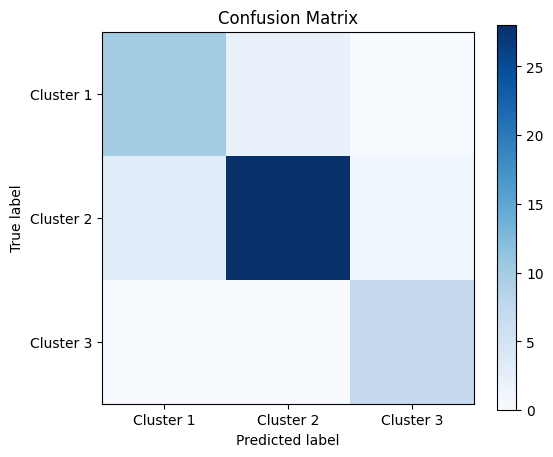

In [9]:
features = ['child_mort', 'income', 'health', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Hierarchical clustering (using AgglomerativeClustering)
n_clusters = 3
agglom = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster'] = agglom.fit_predict(X_norm)  # Assign cluster labels to the data

# Now, perform KNN based on these hierarchical clustering results
# Define the features (include 'Cluster' as an additional feature)
X_knn = data[features + ['Cluster']]  # Features for KNN (including the 'Cluster' column)
y_knn = data['Cluster']  # Target labels are the cluster labels

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(n_clusters), [f'Cluster {i+1}' for i in range(n_clusters)])
plt.yticks(np.arange(n_clusters), [f'Cluster {i+1}' for i in range(n_clusters)])
plt.show()